In [ ]:
# 5.Classifying images: Using CNN for the Cats and Dogs dataset.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Load dataset
dataset_name = 'cats_vs_dogs'
(data_train, data_test), dataset_info = tfds.load(
dataset_name,
split=['train[:80%]', 'train[80%:]'],
as_supervised=True, # Include labels
with_info=True # Include dataset info
)
# Data preprocessing
IMG_SIZE = 150
def preprocess_image(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = image / 255.0 # Normalize pixel values
  return image, label
train_dataset = data_train.map(preprocess_image).shuffle(1000).batch(32).prefetch(1)
test_dataset = data_test.map(preprocess_image).batch(32).prefetch(1)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.F54YRL_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


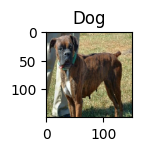

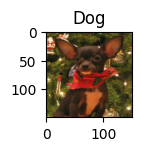

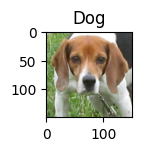

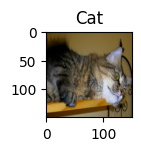

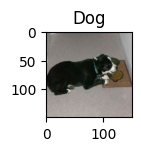

In [4]:
# Visualize a few samples
def plot_samples(dataset, n_samples=5):
  # plt.figure(figsize=(12, 8))
  for i, (image, label) in enumerate(dataset.take(n_samples)):
    ax = plt.subplot(1, n_samples, i + 1)
    plt.imshow(image.numpy())
    plt.title('Cat' if label.numpy() == 0 else 'Dog')
    # plt.axis('off')
    plt.show()
plot_samples(data_train.map(preprocess_image))


In [ ]:

# Build CNN model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dense(512, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid') # Binary classification
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(
train_dataset,
validation_data=test_dataset,
# epochs=10
epochs=5
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.5546 - loss: 0.7398 - val_accuracy: 0.6915 - val_loss: 0.6044
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1169s 2s/step - accuracy: 0.6996 - loss: 0.5782 - val_accuracy: 0.7034 - val_loss: 0.5751
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1172s 2s/step - accuracy: 0.7754 - loss: 0.4792 - val_accuracy: 0.7739 - val_loss: 0.4828
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1173s 2s/step - accuracy: 0.8180 - loss: 0.4031 - val_accuracy: 0.7997 - val_loss: 0.4552
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1158s 2s/step - accuracy: 0.8536 - loss: 0.3318 - val_accuracy: 0.8160 - val_loss: 0.4365


146/146 ━━━━━━━━━━━━━━━━━━━━ 73s 501ms/step - accuracy: 0.8063 - loss: 0.4589
Test Accuracy: 0.82


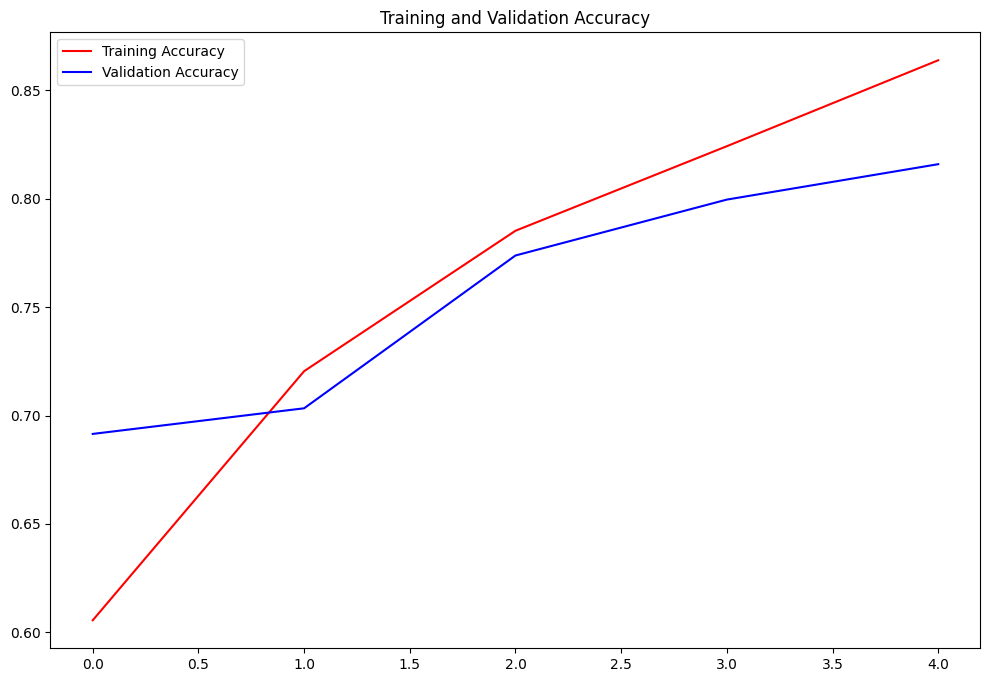

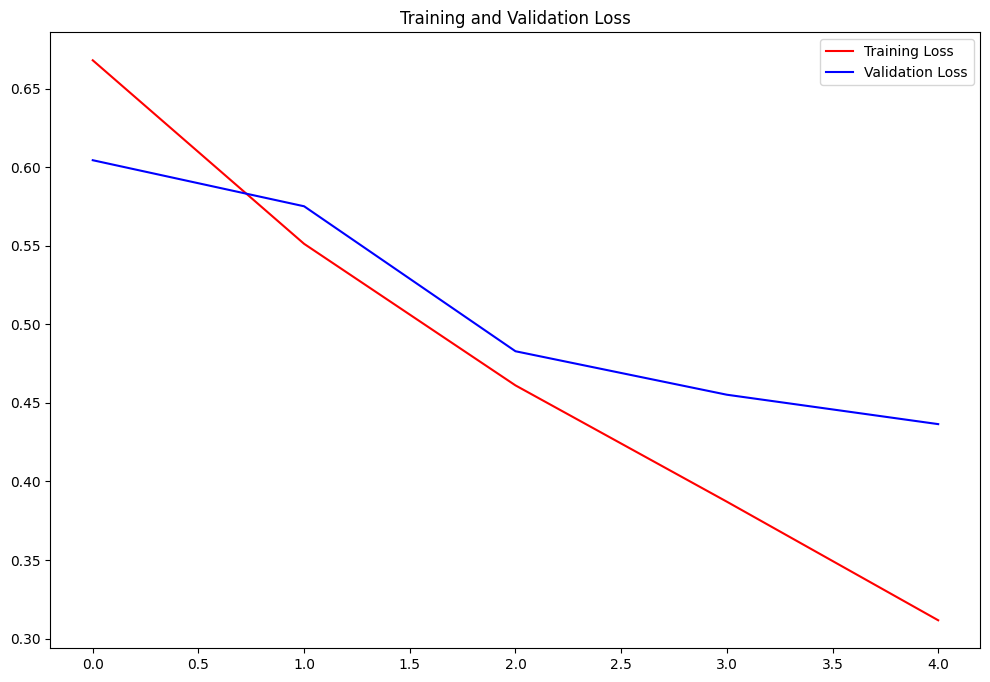

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.2f}")
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()